<a href="https://colab.research.google.com/github/JuanBosco98/Churnning-prediction/blob/main/Limpieza_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/descripcion_destinatarios.csv',sep = ';')
df

,DESCRIPCION_DESTINATARIOS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5713,Los establecidos en la base segunda de la con...
5714,Podrán ser beneficiarias de estas subvenciones...
5715,La convocatoria va dirigida a solicitantes del...
5716,Podrán ser beneficiarias de las ayudas las per...


In [4]:
df.isnull().sum()

DESCRIPCION_DESTINATARIOS    726
dtype: int64

In [5]:
df.iloc[8]['DESCRIPCION_DESTINATARIOS']

'a) Personas mayores que hayan obtenido el reconocimiento de la situación de dependencia y tengan derecho a ser atendidas en un centro o servicio especializado según lo establecido en el SAAD, siempre que así se indique en la correspondiente resolución del Programa Individual de Atención.\r\n\r\n<br />\r\n<br />\r\nb) Personas mayores que, sin tener reconocida oficialmente una situación de dependencia, se encuentren en circunstancias de carácter personal o social que precisen la atención en un centro o servicio especializado, siempre que cumplan los requisitos que se relacionan a continuación.'

In [6]:
df.dropna(inplace=True)

In [7]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Definir función para tokenizar texto
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return tokens
    else:
        return ""
# Crear dataframe con palabras tokenizadas
df_palabras_clave_total = df.apply(lambda row: pd.Series(row['DESCRIPCION_DESTINATARIOS']).fillna("").apply(tokenize_text).explode().reset_index(drop=True), axis=1)

In [10]:
df_palabras_clave_total=df_palabras_clave_total.T

In [11]:
# Convertimos todas las palabras en minúsculas en el dataframe
df_palabras_clave_total = df_palabras_clave_total.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [12]:
# Creamos una lista de preposiciones, artículos determinados y pronombres en español
preposiciones = ['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras']
articulos = ['el', 'la', 'los', 'las','un','una','lo','del','así','otras','al']
pronombres = ['yo', 'tú', 'él', 'ella', 'usted', 'nosotros', 'nosotras', 'vosotros', 'vosotras', 'ellos', 'ellas', 'ustedes']
palabras_vistas = ['ser','podrán','son','va','estas','que','no','una','o','hayan','sean','se','br','b','y','tengan','sus','otra','como','esten','como','aquella']
def remove_words(text):
    if isinstance(text, str):
        # Separamos las palabras
        words = text.split()
        # Eliminamos las preposiciones
        words = [word for word in words if word not in preposiciones]
        # Eliminamos los artículos determinados
        words = [word for word in words if word not in articulos]
        # Eliminamos los pronombres
        words = [word for word in words if word not in pronombres]
        # Eliminamos las palabras
        words = [word for word in words if word not in palabras_vistas]
        # Unimos las palabras para formar el texto de salida
        text = " ".join(words)
        return text
    else:
        return text

df_palabras_clave_total = df_palabras_clave_total.applymap(remove_words)


In [13]:
import string

In [14]:
# Definir una función que elimine los signos de puntuación
def eliminar_puntuacion(texto):
    if isinstance(texto, str):
        return texto.translate(str.maketrans('', '', string.punctuation))
    else:
        return texto

# Aplicar la función a cada elemento del DataFrame
df_palabras_clave_total = df_palabras_clave_total.applymap(eliminar_puntuacion)

In [15]:
frecuencias = df_palabras_clave_total[8].value_counts()
frecuencias.head(10)

                 60
dependencia       2
personas          2
siempre           2
especializado     2
centro            2
servicio          2
situación         2
mayores           2
atención          2
Name: 8, dtype: int64

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df_palabras_clave_total = df_palabras_clave_total.astype(str)
df_palabras_clave_total = df_palabras_clave_total.values.flatten()

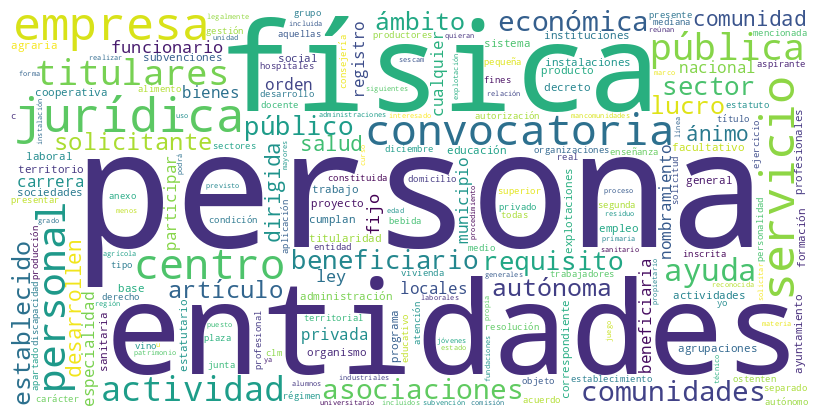

In [26]:
# Combina todas las palabras en una lista
all_words = list(df_palabras_clave_total)

# Nan no saldra en el wordcloud usando el stopword
stopwords=set(STOPWORDS)
stopwords.update(['nan','castillala','mancha','aquella','estas','otro','alguna','este','otras','estén','castilla','sido','dentro','deben',
'deseen','cuya','haya','sea','sido','su','siempre','todo','serán','como','caso','e','cuyo','mismo','situacion','aprueba','mismo','reunan',
'también','autonoma','situación','cuando','todos','fecha','año','años','deberán','misma','encuentren','toda','cumplir','esta','presten',
'siguiente','realicen','incluido'])

# Definimos el wordcloud
wordcloud = WordCloud(background_color="white", width=800, height=400, collocations=False, stopwords=stopwords).generate(' '.join(all_words))

# Mostramos la imagen
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 